In [1]:
#install.packages('ranger')
#install.packages("tidyverse")
#install.packages("rlang")
#install.packages("tree")
#install.packages("rpart")
#install.packages("rpart.plot")
#install.packages("party")

library(tree)
library(rpart)
library(rpart.plot)
library(ggplot2)
#library(rsample)      # data splitting 
library(randomForest) # basic implementation
library(ranger)       # a faster implementation of randomForest
#library(caret)        # an aggregator package for performing many machine learning models
#library(h2o) 

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin


Attaching package: ‘ranger’

The following object is masked from ‘package:randomForest’:

    importance



## Data

The sample was drawn in two stages. First, from the 30 largest cities and towns (representing about two-thirds of the population), author chose 150 sampling clusters at random, with the number of clusters chosen in each city or town approximately proportional to its share of the combined population of the 30 cities/towns. For each of the 150 clusters, he selected the school where students from that cluster attend 8th grade, the final year of primary school. From each school he selected 15 boys at random from a list of all currently enrolled 8th grade students. All 2250 students were administered a survey between April and May 2001, close to the end of the academic year, gathering information on a variety of individual and household characteristics, as well as some simple questions on expected earnings by education.


A second survey was conducted shortly after the beginning of the next academic term (October 2001), with respondents interviewed again about perceived returns to education and current enrolment status, as well as health-related behaviors. A third round, follow-up survey was conducted in May and June of 2005, by which time students should have been finishing their last year of secondary school; for the approximately 120 students still enrolled in 2005 but not yet in their final year of school (due primarily to grade repetition), he conducted follow-ups for the next 2 years. He was able to re-interview 94% of youths in round 2 and 89% in round 3 (though for the educational outcomes, we were able to track students administratively even if we did not interview them, which reduced attrition to 3 and 9%, respectively). Attrition rates were very similar for treatment and control youths; in round 2, he was able to re-interview 1053 of the 1125 control students and 1057 of the 1125 treatment students, and in round 3, he was able to re-interview 1006 of the controls and 1005 of the treatment sample. 

## Descriptive statistics 



treat -  treatment 
ffs - father finished secondary school
lfi2 - log family income in round 2
fim - family income missing
perf - perforamnce at school
retedu - return to education 
returntosch - retuned to school
cwork - currently works (2 for round 2, 3 for round 3)
hpw - hours worked per week (2 for round 2,3 for round 3)
epw - earnings per week (2 for round 2, 3 for round 3)
dipw - disposable income per week (2 for round 2, 3 for round 3)
csmoke - currently smokes (2 for round 2, 3 for round 3)
cda - currently drinks alchohol (2 for round 2, 3 for round 3)
droncew - drinks at least once a week (2 for round 2, 3 for round 3)
drevd - drinks every day (2 for round 2, 3 for round 3)
finhigh - finished high school (2 for round 2, 3 for round 3)
yearssch - completed years of schooling (2 for round 2, 3 for round 3)
drfr - drink frequency 1-4 (2 for round 2, 3 for round 3)
patient - patience level of the student (1-5)
frpsmoke - fraction peers smoke (2 for round 2, 3 for round 3)
frpdrink - fraction of peers drink (2 for round 2, 3 for round 3)
risk - risk 
smkbad - smoking is bad for health
drinkbad- drinking is bad for helath 
discout - implied discount rate

In [83]:
set.seed(123)
funcrange <- function(N, mean, sd, lwr, upr, nnorm) {
  samp <- rnorm(nnorm, mean, sd)
  samp <- samp[samp >= lwr & samp <= upr]
  if (length(samp) >= N) {
    return(sample(samp, N))
  }  
  stop(simpleError("Try increasing nnorm."))
}

#dgp2 <- function(n){

n=4022

########### Socioeconomic characteristics #######################

    vec<-c(rep('did not finish',1267),rep('finished',744))
    ffs<-sample(vec)
    lfi<- rnorm(n,mean=8.15, sd=0.3)
    perf<-rnorm(n, mean=1.36, sd=1.32)
    age<-rnorm(n, mean=14.3, sd=0.79)

################### outcomes round 2 ###########################

    vec1<-c(rep('did not return',845),rep('returned',1166))
    returntosch<-sample(vec1)
    vec2<-c(rep(0,1408),rep(1,603))
    cwork2<-sample(vec2)
    hpw<-rnorm(n, mean=4.1, sd=8.9)
    hpw2<-hpw*cwork2
    epw<-abs(rnorm(n, mean=67.7, sd=172.6))
    epw2<-epw*cwork2
    dipw2<-abs(rnorm(n, mean=56.4, sd=71.1))
    vectreat<-c(rep('treated', 1004), rep('control', 1007))
    treat<-sample(vectreat)
    frpsmoke2<-funcrange(N=n, mean=2.68, sd=1.13, lwr=1, upr=5, nnorm=10000)
    frpdrink2<-funcrange(N=n, mean=3.32, sd=1.27, lwr=1, upr=5, nnorm=10000) 
    
    X2<-data.frame(ffs, lfi, perf, age, returntosch, cwork2, hpw2, epw2, dipw2, treat,frpsmoke2, frpdrink2)
    
 #   return (data.frame(X2))}

#dgp3 <- function(n){


################# outcomes round 3 #############################

    vectreat<-c(rep('treated', 1004), rep('control', 1007))
    treat<-sample(vectreat)
    vec7<-c(rep('did not finish',1368),rep('finished',643))
    finhigh<-sample(vec7)
    yearssch<-rnorm(n, mean=9.86, sd=1.77)
    vec8<-c(rep(0,1288),rep(1,723))
    cwork3<-sample(vec8)
    hpww<-abs(rnorm(n, mean=6, sd=11.6))
    hpw3<-hpww*cwork3
    epww<-abs(rnorm(n, mean=250.6, sd=833.4))
    epw3<-epww*cwork3
    dipw3<-abs(rnorm(n, mean=121.2, sd=391.6))
    patient3<-funcrange(N=n, mean=2.06, sd=1.14, lwr=1, upr=5, nnorm=10000)
    frpsmoke3<-funcrange(N=n, mean=3.31, sd=1.24, lwr=1, upr=5, nnorm=10000)
    frpdrink3<-funcrange(N=n, mean=4.48, sd=1, lwr=1, upr=5, nnorm=10000)
    risk<-funcrange(N=n, mean=1.98, sd=1.2, lwr=1, upr=5, nnorm=10000)
    
    X3<-data.frame(ffs, lfi, perf, age, treat, finhigh, yearssch, cwork3, hpw3, epw3, dipw3, patient3, frpsmoke3, 
              frpdrink3, risk )
#    return (data.frame(X3))}


In [84]:
#### Round 2

#dgp4 <- function(n){
    vec3<-c(rep('does not smoke',1911),rep('smokes',100))
    csmoke2<-sample(vec3)

    vec4<-c(rep('does not drink',785),rep('drinks',1226))
    cda2<-sample(vec4)

    vec5<-c(rep('does not drink once a week',1629),rep('drinks once a week',382))
    droncew2<-sample(vec5)

    vec6<-c(rep('does not dirnk every day',1971),rep('drinks every day',40))
    drevd2<-sample(vec6)

    drfr2<-funcrange(N=n, mean=1.96, sd=0.7, lwr=1, upr=4, nnorm=10000)
    Y2<-data.frame(csmoke2, cda2, droncew2, drevd2, drfr2)
#    return(data.frame(X4))}

#### Round 3

#dgp5 <- function(n){
    vec9<-c(rep('does not smoke',1750),rep('smokes',261))
    csmoke3<-sample(vec9)

    vec10<-c(rep('does not drink',543),rep('drinks',1468))
    cda3<-sample(vec10)

    vec11<-c(rep('does not drink once a week',1086),rep('drinks once a week',925))
    droncew3<-sample(vec11)

    vec12<-c(rep('does not drink every day',1750),rep('drinks every day',261))
    drevd3<-sample(vec12)

    drfr3<-funcrange(N=n, mean=2.37, sd=0.95, lwr=1, upr=4, nnorm=10000)

    smkbad<-funcrange(N=n, mean=3.67, sd=0.68, lwr=1, upr=5, nnorm=10000)

    drinkbad<-funcrange(N=n, mean=2.49, sd=0.63, lwr=1, upr=5, nnorm=10000) 
    Y3<-data.frame(csmoke3, cda3, droncew3, drevd3, drfr3, smkbad, drinkbad)
 #   return(data.frame(X5))}


In [85]:

#converting categorical to numeric
X2$cwork2<-as.factor(X2$cwork2)
X2$lfi<-as.numeric(X2$lfi)
X2$perf<-as.numeric(X2$perf)
X2$age<-as.numeric(X2$age)
X2$hpw2<-as.numeric(X2$hpw2)
X2$epw2<-as.numeric(X2$epw2)
X2$dipw2<-as.numeric(X2$dipw2)
X2$frpsmoke2<-round(X2$frpsmoke2)
X2$frpdrink2<-round(X2$frpdrink2)
X2$frpsmoke2<-as.factor(X2$frpsmoke2)
X2$frpdrink2<-as.factor(X2$frpdrink2)
#split into test and train data
X2.train<-X2[1:2011,]
X2.test<-X2[2011:4022,]

#converting categorical to numeric
X3$cwork3<-as.factor(X3$cwork3)
X3$lfi<-as.numeric(X3$lfi)
X3$perf<-as.numeric(X3$perf)
X3$age<-as.numeric(X3$age)
X3$hpw3<-as.numeric(X3$hpw3)
X3$epw3<-as.numeric(X3$epw3)
X3$dipw3<-as.numeric(X3$dipw3)
X3$frpsmoke3<-round(X3$frpsmoke3)
X3$frpdrink3<-round(X3$frpdrink3)
X3$patient3<-round(X3$patient3)
X3$risk<-round(X3$risk)
X3$frpsmoke3<-as.factor(X3$frpsmoke3)
X3$frpdrink3<-as.factor(X3$frpdrink3)
X3$patient3<-as.factor(X3$patient3)
X3$risk<-as.factor(X3$risk)
X3$yearssch<-as.numeric(X3$yearssch)
#split into test and train data
X3.train<-X3[1:2011,]
X3.test<-X3[2011:4022,]


Y2$drfr2<-round(Y2$drfr2)
Y2$drfr2<-as.factor(Y2$drfr2)
Y2.train<-Y2[1:2011,]
Y2.test<-Y2[2011:4022,]

Y3$drfr3<-round(Y3$drfr3)
Y3$smkbad<-round(Y3$smkbad)
Y3$drinkbad<-round(Y3$drinkbad)
Y3$drfr3<-as.factor(Y3$drfr3)
Y3$smkbad<-as.factor(Y3$smkbad)
Y3$drinkbad<-as.factor(Y3$drinkbad)
Y3.train<-Y3[1:2011,]
Y3.test<-Y3[2011:4022,]

head(X2.train)
head(X3.train)

ffs,lfi,perf,age,returntosch,cwork2,hpw2,epw2,dipw2,treat,frpsmoke2,frpdrink2
did not finish,8.206675,0.66039679,14.83323,did not return,0,0.000000,0.0000,99.42785,treated,4,3
did not finish,8.044620,0.09049853,15.03269,returned,1,15.151907,311.1405,56.87559,control,4,4
did not finish,8.076635,2.00618017,14.09414,returned,0,0.000000,0.0000,35.68271,treated,2,3
did not finish,8.478438,3.13064680,15.72647,did not return,0,0.000000,0.0000,83.40495,control,4,4
did not finish,7.696765,0.60705954,16.16946,returned,0,0.000000,0.0000,127.11408,treated,3,3
did not finish,8.001065,1.52312272,15.33106,returned,1,1.041186,123.3563,24.78075,control,3,4


ffs,lfi,perf,age,treat,finhigh,yearssch,cwork3,hpw3,epw3,dipw3,patient3,frpsmoke3,frpdrink3,risk
did not finish,8.206675,0.66039679,14.83323,control,finished,8.278659,1,3.241902,1110.37692,255.2028,3,3,4,3
did not finish,8.044620,0.09049853,15.03269,treated,did not finish,10.556299,0,0.000000,0.00000,250.3793,4,2,4,3
did not finish,8.076635,2.00618017,14.09414,control,did not finish,7.743059,0,0.000000,0.00000,292.0334,2,3,3,3
did not finish,8.478438,3.13064680,15.72647,control,finished,4.456305,0,0.000000,0.00000,178.6854,1,3,4,3
did not finish,7.696765,0.60705954,16.16946,control,did not finish,11.636614,1,17.621284,56.97227,303.1478,3,2,4,4
did not finish,8.001065,1.52312272,15.33106,treated,finished,8.808237,0,0.000000,0.00000,456.3244,4,3,5,2


In [86]:
str(X2.train)
str(X3.train)

'data.frame':	2011 obs. of  12 variables:
 $ ffs        : Factor w/ 2 levels "did not finish",..: 1 1 1 1 1 1 2 1 2 1 ...
 $ lfi        : num  8.21 8.04 8.08 8.48 7.7 ...
 $ perf       : num  0.6604 0.0905 2.0062 3.1306 0.6071 ...
 $ age        : num  14.8 15 14.1 15.7 16.2 ...
 $ returntosch: Factor w/ 2 levels "did not return",..: 1 2 2 1 2 2 1 1 2 1 ...
 $ cwork2     : Factor w/ 2 levels "0","1": 1 2 1 1 1 2 1 2 1 1 ...
 $ hpw2       : num  0 15.2 0 0 0 ...
 $ epw2       : num  0 311 0 0 0 ...
 $ dipw2      : num  99.4 56.9 35.7 83.4 127.1 ...
 $ treat      : Factor w/ 2 levels "control","treated": 2 1 2 1 2 1 1 2 1 2 ...
 $ frpsmoke2  : Factor w/ 5 levels "1","2","3","4",..: 4 4 2 4 3 3 3 3 2 2 ...
 $ frpdrink2  : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 4 3 4 3 3 2 4 ...
'data.frame':	2011 obs. of  15 variables:
 $ ffs      : Factor w/ 2 levels "did not finish",..: 1 1 1 1 1 1 2 1 2 1 ...
 $ lfi      : num  8.21 8.04 8.08 8.48 7.7 ...
 $ perf     : num  0.6604 0.0905 2.0062 3.

## Tree 2nd round

### Currently drinks round 2


Call:
 randomForest(formula = Y2.train$cda2 ~ ., data = X2.train, proximity = T,      importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 42.27%
Confusion matrix:
               does not drink drinks class.error
does not drink            121    664   0.8458599
drinks                    186   1040   0.1517129

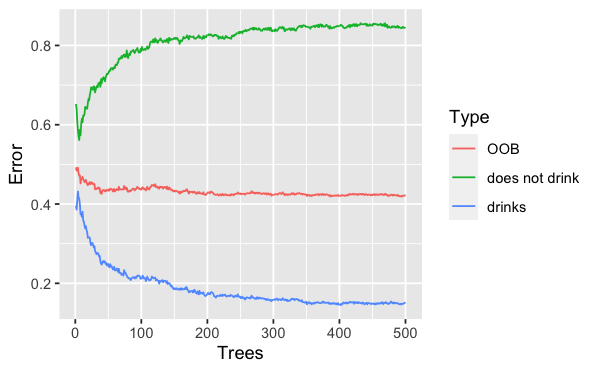

In [92]:
rf.cda2<-randomForest(Y2.train$cda2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.cda2
#rf.cda2.pred<-predict(rf.cda2,round2.x.test )
#rf.cda2$err.rate

#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.cda2$err.rate), times=3),
    Type=rep(c("OOB", "does not drink", "drinks"), each=nrow(rf.cda2$err.rate)),
    Error=c(rf.cda2$err.rate[,"OOB"],
           rf.cda2$err.rate[,"does not drink"],
           rf.cda2$err.rate[,'drinks']))
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3.1)

In [93]:
importance(rf.cda2)

ERROR: Error in UseMethod("importance"): нет подходящего метода для 'importance' применяемого к объекту класса "c('randomForest.formula', 'randomForest')"


In [97]:
rff.cda2<-randomForest(formula=Y2.train$cda2~., data=X2.train,proximity=T, ntree=1000, importance=T, mtry=4)
#,mtry=3,
rff.cda2

#To see if 1000 trees is enough for optimal classification, we can plot the error rates
#oob.error.data<-data.frame( 
#    Trees=rep(1:nrow(rff.cda2$err.rate), times=3),
#    Type=rep(c("OOB", "does not drink", "drinks"), each=nrow(rff.cda2$err.rate)),
#    Error=c(rff.cda2$err.rate[,"OOB"],
#           rff.cda2$err.rate[,"does not drink"],
#           rff.cda2$err.rate[,'drinks']))
#ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=5, repr.plot.height=3.1)


Call:
 randomForest(formula = Y2.train$cda2 ~ ., data = X2.train, proximity = T,      ntree = 1000, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 41.77%
Confusion matrix:
               does not drink drinks class.error
does not drink            130    655   0.8343949
drinks                    185   1041   0.1508972

In [95]:
## adding more trees did not help 


[1] 0.3903531 0.4037792 0.4201890 0.4152163 0.4221780 0.4221780 0.4211835
 [8] 0.4241671 0.4211835 0.4137245

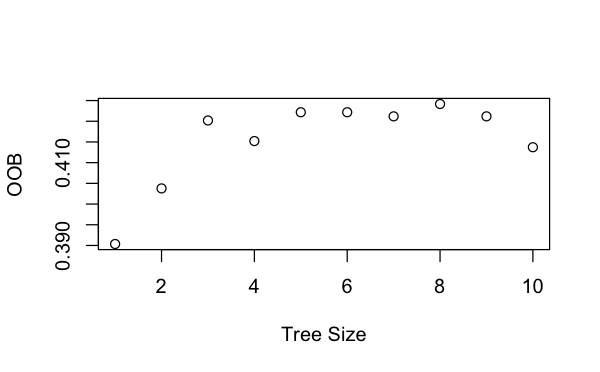

In [96]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$cda2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=3, repr.plot.height=3)

### Currently smokes round 2 


Call:
 randomForest(formula = Y2.train$csmoke2 ~ ., data = X2.train,      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.97%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1911      0           0
smokes                    100      0           1

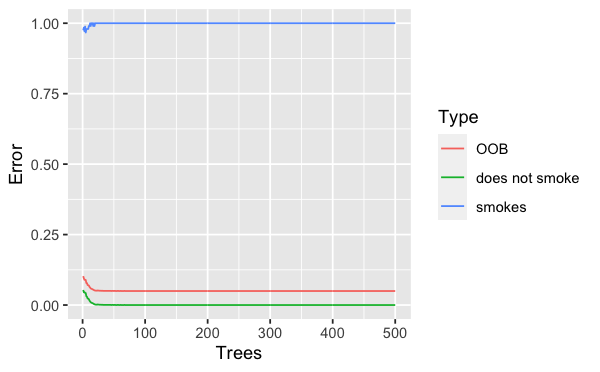

In [55]:
rf.csmoke2<-randomForest(formula=Y2.train$csmoke2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.csmoke2
#rf.cda2.pred<-predict(rf.cda2,round2.x.test )
#rf.cda2$err.rate

#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.csmoke2$err.rate), times=3),
    Type=rep(c("OOB", "does not smoke", "smokes"), each=nrow(rf.csmoke2$err.rate)),
    Error=c(rf.csmoke2$err.rate[,"OOB"],
           rf.csmoke2$err.rate[,"does not smoke"],
           rf.csmoke2$err.rate[,'smokes']))
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3.2)

In [57]:
rff.csmoke2<-randomForest(formula=Y2.train$csmoke2~., data=X2.train,proximity=T, ntree=1000, importance=T)
#,mtry=3,
rff.csmoke2

#To see if 1000 trees is enough for optimal classification, we can plot the error rates
#oob.error.data<-data.frame( 
#    Trees=rep(1:nrow(rff.csmoke2$err.rate), times=3),
#    Type=rep(c("OOB", "does not smoke", "smokes"), each=nrow(rff.csmoke2$err.rate)),
#    Error=c(rff.csmoke2$err.rate[,"OOB"],
#           rff.csmoke2$err.rate[,"does not smoke"],
#           rff.csmoke2$err.rate[,'smokes']))
#ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=5, repr.plot.height=3.2)


Call:
 randomForest(formula = Y2.train$csmoke2 ~ ., data = X2.train,      proximity = T, ntree = 1000, importance = T) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.97%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1911      0           0
smokes                    100      0           1

[1] 0.04972650 0.04972650 0.04972650 0.04972650 0.05022377 0.05022377
 [7] 0.05022377 0.05022377 0.05022377 0.05022377

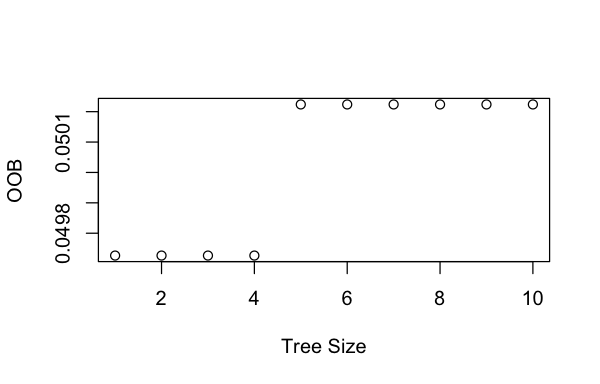

In [58]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$csmoke2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

### Droncew - Drinks at least once a week round 2


Call:
 randomForest(formula = Y2.train$droncew2 ~ ., data = X2.train,      proximity = T, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 19.24%
Confusion matrix:
                           does not drink once a week drinks once a week
does not drink once a week                       1622                  7
drinks once a week                                380                  2
                           class.error
does not drink once a week 0.004297115
drinks once a week         0.994764398

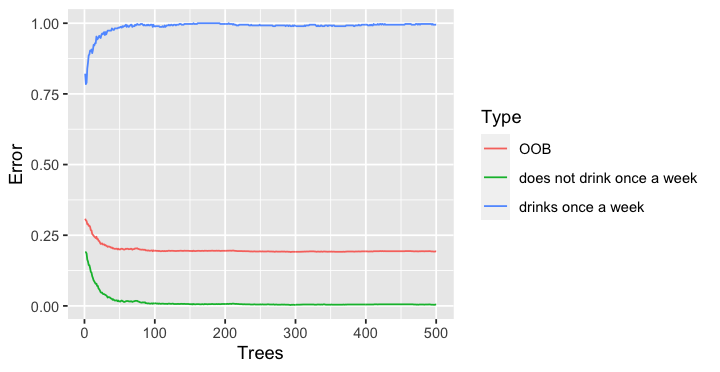

In [64]:
rf.droncew2<-randomForest(formula=Y2.train$droncew2~., data=X2.train,proximity=T, importance=T, mtry=4)
#ntree=500,mtry=3,
rf.droncew2
#rf.cda2.pred<-predict(rf.cda2,round2.x.test )
#rf.cda2$err.rate

#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.droncew2$err.rate), times=3),
    Type=rep(c("OOB", "does not drink once a week", "drinks once a week"), each=nrow(rf.droncew2$err.rate)),
    Error=c(rf.droncew2$err.rate[,"OOB"],
           rf.droncew2$err.rate[,"does not drink once a week"],
           rf.droncew2$err.rate[,'drinks once a week']))
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=3.1)

[1] 0.1899552 0.1909498 0.1919443 0.1909498 0.1959224 0.1959224 0.1944306
 [8] 0.1944306 0.1969170 0.1964197

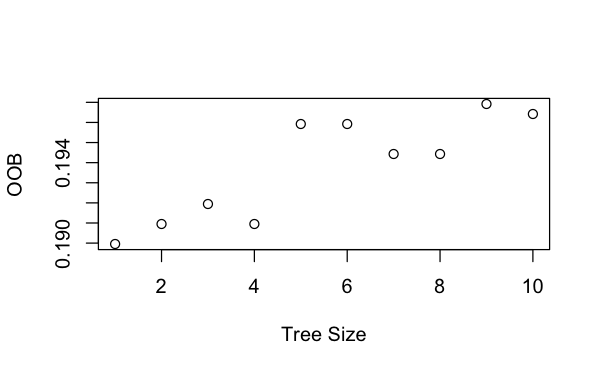

In [62]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$droncew2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

### Drevd Drinks every day round 2 

In [65]:
rf.drevd2<-randomForest(formula=Y2.train$drevd2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.drevd2
#rf.cda2.pred<-predict(rf.cda2,round2.x.test )
#rf.cda2$err.rate

#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.drevd2$err.rate), times=3),
    Type=rep(c("OOB", "does not drink every day", "drinks every day"), each=nrow(rf.drevd2$err.rate)),
    Error=c(rf.drevd2$err.rate[,"OOB"],
           rf.drevd2$err.rate[,"does not drink every day"],
           rf.drevd2$err.rate[,'drinks every day']))
#ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=5, repr.plot.height=3.1)


Call:
 randomForest(formula = Y2.train$drevd2 ~ ., data = X2.train,      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.99%
Confusion matrix:
                         does not dirnk every day drinks every day class.error
does not dirnk every day                     1971                0           0
drinks every day                               40                0           1

ERROR: Error in rf.drevd2$err.rate[, "does not drink every day"]: подгруппа выходит за пределы


## Tree 3rd round

In [74]:
rf.cda3<-randomForest(formula=Y3.train$cda3~., 
             data=X3.train, ntree=500, mtry=3, importance=T)
rf.cda3
#rf.cda3.pred<-predict(rf.cda3,round3.data.test )



Call:
 randomForest(formula = Y3.train$cda3 ~ ., data = X3.train, ntree = 500,      mtry = 3, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 27%
Confusion matrix:
               does not drink drinks class.error
does not drink              8    535 0.985267035
drinks                      8   1460 0.005449591

In [36]:
?data.frame

## Results

## OLS Results for the third round

In [15]:
######## Currently smokes
ols.csmoke3<-lm(csmoke3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
                data=round3.data.train)
ols.csmoke3.pred<-predict(ols.csmoke3, round3.data.test)
MSE(ols.csmoke3.pred, round3.data.test$csmoke3)
####### Currently drinks
ols.cda3<-lm(cda3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
             data=round3.data.train)
ols.cda3.pred<-predict(ols.cda3, round3.data.test)
MSE(ols.cda3.pred, round3.data.test$cda3)
####### Drinks once a week
ols.droncew3<-lm(droncew3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
                 data=round3.data.train)
ols.droncew3.pred<-predict(ols.droncew3, round3.data.test)
MSE(ols.droncew3.pred, round3.data.test$droncew3)
####### Drinks every day 
ols.drevd3<-lm(drevd3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
               data=round3.data.train)
ols.drevd3.pred<-predict(ols.drevd3, round3.data.test)
MSE(ols.drevd3.pred, round3.data.test$drevd3)
####### Drinking frequency 
ols.drfr3<-lm(drfr3~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
              data=round3.data.train)
ols.drfr3.pred<-predict(ols.drfr3, round3.data.test)
MSE(ols.drfr3.pred, round3.data.test$drfr3)
###### Smoking is bad
ols.smkbad<-lm(smkbad~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
               data=round3.data.train)
ols.smkbad.pred<-predict(ols.smkbad, round3.data.test)
MSE(ols.smkbad.pred, round3.data.test$smkbad)
###### Drinking is bad
ols.drinkbad<-lm(drinkbad~ffs+lfi+perf+age+finhigh+yearssch+cwork3+hpw3+epw3+dipw3+treat+frpsmoke3+frpdrink3, 
                 data=round3.data.train)
ols.drinkbad.pred<-predict(ols.drinkbad, round3.data.test)
MSE(ols.drinkbad.pred, round3.data.test$drinkbad)



Warning message in predict.lm(ols.csmoke3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.1138303

Warning message in predict.lm(ols.cda3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.1980475

Warning message in predict.lm(ols.droncew3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.2496061

Warning message in predict.lm(ols.drevd3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.11389

Warning message in predict.lm(ols.drfr3, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.5449377

Warning message in predict.lm(ols.smkbad, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.4083425

Warning message in predict.lm(ols.drinkbad, round3.data.test):
“prediction from a rank-deficient fit may be misleading”

[1] 0.3673549

## OLS Results for the second round

In [49]:
######## Currently smokes
ols.csmoke2<-lm(round2.y.train$csmoke2~., data=round2.x.train)
ols.csmoke2.pred<-predict(ols.csmoke2, round2.x.test)
MSE(ols.csmoke2.pred, round2.y.test$csmoke2)
####### Currently drinks
ols.cda2<-lm(cda2~., data=round2.x.train)
ols.cda2.pred<-predict(ols.cda2, round2.x.test)
MSE(ols.cda2.pred, round2.y.test$cda2)
####### Drinks once a week
ols.droncew2<-lm(droncew2~ffs+lfi+perf+age+returntosch+cwork2+hpw2+epw2+dipw2+treat+frpsmoke2+frpdrink2, 
                 data=round2.data.train)
ols.droncew2.pred<-predict(ols.droncew2, round2.data.test)
MSE(ols.droncew2.pred, round2.data.test$droncew2)
####### Drinks every day 
ols.drevd2<-lm(drevd2~ffs+lfi+perf+age+returntosch+cwork2+hpw2+epw2+dipw2+treat+frpsmoke2+frpdrink2, 
               data=round2.data.train)
ols.drevd2.pred<-predict(ols.drevd2, round2.data.test)
MSE(ols.drevd2.pred, round2.data.test$drevd2)
####### Drinking frequency 
ols.drfr2<-lm(drfr2~ffs+lfi+perf+age+returntosch+cwork2+hpw2+epw2+dipw2+treat+frpsmoke2+frpdrink2, 
              data=round2.data.train)
ols.drfr2.pred<-predict(ols.drfr2, round2.data.test)
MSE(ols.drfr2.pred, round2.data.test$drfr2)


 

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor lfi has new levels 7.07492783422276, 7.13106968431062, 7.13205824154341, 7.23252878603557, 7.2413416263179, 7.24701310825938, 7.25739301431912, 7.30718267554453, 7.32075402047526, 7.32504448869126, 7.34004247575345, 7.34114304106801, 7.34149385372814, 7.34847484165904, 7.35314290527505, 7.37031709237462, 7.38929897330037, 7.39612909933856, 7.40047848209824, 7.40715218443826, 7.41115646369178, 7.42100588515437, 7.42239194153543, 7.43479047319743, 7.44236526145253, 7.44700916562583, 7.4477273140587, 7.44867165481766, 7.45271990189723, 7.46260371443999, 7.47029626152457, 7.47171621458058, 7.4765652964206, 7.48901487959909, 7.48933244518296, 7.49249424970114, 7.49434019491703, 7.49652227506641, 7.49717190606557, 7.50103977852013, 7.50240640479962, 7.50293941242345, 7.51258877991813, 7.52021294936381, 7.52270401098968, 7.52377020591535, 7.52463846439885, 7.52962041472542, 7.53184332580563, 7.53516908589326, 7.54175563649529, 7.5424028342884, 7.54543149652121, 7.54625272335826, 7.54828804424362, 7.54972899432239, 7.557381436018, 7.5593191169025, 7.56867445353484, 7.56965867359895, 7.57074281851423, 7.57106432927872, 7.57846025495087, 7.57991259888954, 7.58079473722974, 7.58271212842904, 7.58335684581363, 7.58455348551897, 7.59041446201156, 7.59143936674955, 7.59238299984759, 7.59351954294309, 7.59573993573346, 7.59690456035133, 7.59870773173582, 7.60051139325767, 7.60362324917029, 7.60809942931269, 7.60841742129848, 7.60904345905921, 7.60944549583001, 7.61062254297019, 7.61067885910135, 7.6183840420111, 7.61839745112739, 7.61897745494672, 7.61925965983996, 7.61933155195762, 7.62208279023902, 7.62332198039228, 7.62369467612066, 7.63013011852402, 7.63170313223744, 7.63175123104522, 7.63267340551232, 7.6345222948907, 7.63565213143723, 7.63891845054899, 7.64027488092382, 7.64145555885806, 7.64162765667701, 7.64909206555187, 7.64980464615161, 7.65157857633186, 7.65455624037449, 7.65780808442237, 7.65842084686476, 7.66541383674181, 7.66779303128091, 7.66786763004229, 7.66927422335244, 7.66940546216555, 7.67010499523372, 7.67159760218867, 7.67260971121892, 7.67591049919323, 7.67839912259722, 7.67910586907515, 7.68110887213741, 7.68133190261385, 7.68216401771426, 7.68287530684093, 7.68304870606374, 7.68362555324434, 7.68559656075114, 7.6860625683752, 7.6860934431877, 7.68646567815459, 7.68863483604927, 7.6897898374511, 7.6912560322725, 7.69321800579554, 7.69321969675443, 7.69476286482448, 7.69486623967813, 7.69562578319189, 7.69854972622803, 7.70146348575398, 7.70280787266, 7.70400184803614, 7.70435346871782, 7.70755625322128, 7.70831447625625, 7.70867023482045, 7.70886866353199, 7.70903079049215, 7.71121345453335, 7.71286179928931, 7.71329700439846, 7.71468821302462, 7.7162017424341, 7.71715411432648, 7.71809671281106, 7.71884416288025, 7.72234556736795, 7.72519209204216, 7.7253106220637, 7.72690172733576, 7.72701218158366, 7.727812914158, 7.72834941310272, 7.73023485846728, 7.73209357647244, 7.73501162389568, 7.73569840856752, 7.73707596944173, 7.73896545024029, 7.74179348038934, 7.74179414815278, 7.74224159185382, 7.74264378071289, 7.74349459024772, 7.74372039798104, 7.74373555854928, 7.74473823147332, 7.7450832418767, 7.74581379704276, 7.74821831649385, 7.74925645432909, 7.74933145540486, 7.75079401528758, 7.75317702443601, 7.75350753348224, 7.75352624911638, 7.75454605818949, 7.75464419971557, 7.7589523222195, 7.7596907618274, 7.76101947202626, 7.76228143341399, 7.76232136316788, 7.76234421588414, 7.76308124840658, 7.76450383963174, 7.76460029965344, 7.76482803475623, 7.76604962206374, 7.76755060007163, 7.76846197062095, 7.76855547514383, 7.76976716344827, 7.77057676271846, 7.77198363681963, 7.77214712949176, 7.77252839603555, 7.77266953629616, 7.7731720557128, 7.77355591416704, 7.77395911100165, 7.7757883496394, 7.77597736957168, 7.77781982628319, 7.7806784200395, 7.78333444318508, 7.78339808589218, 7.78460400571886, 7.78490823695461, 7.78521574721089, 7.78701471088647, 7.78910535496829, 7.79003310626525, 7.79077982895323, 7.79100469408422, 7.79252926071019, 7.79264837562529, 7.79291662735846, 7.79303207325544, 7.79320773345437, 7.79580965239288, 7.79596488090817, 7.79701758983043, 7.79707803534699, 7.7979505195266, 7.7983138956221, 7.79883108929532, 7.79889932294907, 7.80028470515087, 7.80190782175325, 7.80407736905878, 7.80511397721952, 7.80544596990404, 7.80665854911942, 7.80839155890413, 7.80937708101069, 7.8138465913519, 7.81551373171084, 7.81618315144407, 7.81779086204906, 7.8180324849101, 7.81831807590124, 7.81928897359308, 7.82065252807115, 7.82094628835959, 7.82240022374007, 7.82305614187079, 7.8230714120216, 7.82311836696673, 7.82351107092771, 7.82385039610925, 7.82420618075364, 7.82443204053378, 7.82564789659678, 7.82575828706306, 7.82609875060712, 7.82613803637563, 7.82634874228246, 7.82672040220037, 7.8268994250446, 7.82749285705143, 7.82871044816373, 7.82920030355154, 7.83006741414529, 7.83016699018224, 7.83018814244669, 7.83113361626803, 7.83120160905234, 7.83154574834115, 7.83182848606879, 7.83223236773023, 7.8327973599166, 7.8330550657915, 7.8331073920518, 7.83313290273878, 7.8332175690471, 7.83366439990418, 7.83429203228367, 7.83447625510597, 7.83488734119728, 7.83538861771254, 7.83554890811911, 7.8378376199683, 7.83826990004561, 7.83921980030905, 7.83992005870492, 7.84043039121183, 7.84077190084156, 7.84077830517063, 7.84149234045392, 7.84382960409932, 7.84418804118561, 7.84425490493274, 7.84532523954727, 7.84586423515849, 7.8467820273378, 7.84733692902822, 7.84760280682879, 7.84788997533429, 7.8496569088693, 7.85218976512716, 7.85300931780193, 7.85456070985878, 7.85474429095281, 7.85492853383645, 7.85510497908563, 7.85670116642856, 7.85711451057077, 7.85778850528331, 7.85846183242227, 7.85878449904305, 7.86011758713125, 7.86091621211602, 7.86130070006872, 7.86136069881297, 7.86302636346799, 7.86339407252687, 7.86457719018104, 7.86475710244832, 7.86486564795593, 7.86497440646517, 7.86529968509016, 7.86624923052372, 7.86683019159682, 7.86718313116036, 7.86728288393042, 7.86787553617937, 7.86820406851726, 7.86836723592313, 7.86870131752656, 7.86894496889937, 7.86911477061625, 7.8695036984678, 7.86997561168311, 7.87018680390734, 7.87261289261414, 7.87279235774606, 7.87327276369109, 7.87430775776779, 7.87436824183798, 7.87470004790929, 7.87545880089663, 7.87575102491045, 7.87647748723744, 7.87801118056875, 7.8781189929006, 7.87819416496822, 7.87916758264484, 7.87994181496399, 7.88010536367011, 7.88195414399537, 7.88213347045038, 7.88243606724674, 7.88294951915863, 7.88474817575303, 7.8847860367365, 7.88518316469136, 7.88565254563596, 7.8867949830541, 7.88728805190272, 7.88814865080244, 7.88855296775482, 7.88940504055901, 7.89021516363949, 7.89031852521937, 7.890976127509, 7.89321432823632, 7.89348368190558, 7.8945564089584, 7.89533737728785, 7.89570793261541, 7.89588925984456, 7.8960315740714, 7.89605318698952, 7.89678892081936, 7.89696768812291, 7.89705902427276, 7.8975273474264, 7.89892278816361, 7.89965706908, 7.90072602980132, 7.90183850677564, 7.90221228329853, 7.90222295642327, 7.90237288335221, 7.90330045891123, 7.9038385013279, 7.90477095440455, 7.90492417822818, 7.905639109018, 7.90617085139636, 7.90634589645815, 7.90637167029871, 7.90762945936087, 7.9076799485927, 7.90801944466797, 7.90921670944795, 7.90951467572672, 7.91014980662685, 7.91038608448414, 7.91094695796443, 7.91105977221006, 7.91133126467799, 7.91231679060183, 7.91375655405287, 7.91442381802889, 7.91540240160844, 7.91581041664624, 7.91603535960442, 7.91738257467181, 7.91877614843641, 7.91985299495326, 7.92085971700053, 7.92108360445958, 7.92218659306506, 7.92231891216581, 7.92366287792212, 7.92454933009549, 7.92767901084398, 7.92772143765385, 7.9284961672518, 7.9287856497812, 7.92909316745177, 7.93021958383156, 7.93121141558151, 7.93165989617681, 7.93178995567093, 7.93203792974179, 7.93246770301407, 7.93268219466719, 7.93368455045876, 7.93376356681851, 7.93387586828453, 7.93430519699881, 7.9349420161072, 7.93503070417432, 7.93564458833941, 7.9358706417561, 7.93599414700284, 7.93711184729142, 7.93743628585972, 7.93788476997254, 7.93802692971993, 7.93833885686776, 7.93852366145206, 7.93914644488335, 7.9417889280516, 7.94235408316943, 7.94243889177588
